In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded survey form must be entirely filled out and submitted on or before **11:59pm**.  Students must come to class the next day prepared to discuss the material covered in this assignment. 

---

# PCA 19: Introduction to CUDA

### Goals for today's pre-class assignment 
1. [Basic steps in CUDA programming.](#Basic-steps-in-CUDA-programming.)
2. [CUDA on the HPCC](#CUDA-on-the-HPCC)
3. [Scheduling GPUs on HPCC](#Scheduling-GPUs-on-HPCC)
4. [Assignment wrap up](#Assignment-wrap-up)





---
<a name=Basic-steps-in-CUDA-programming.></a>
# 1. Basic steps in CUDA programming.




&#9989; **<font color=red>DO THIS:</font>** Watch the following videos and answer the questions.

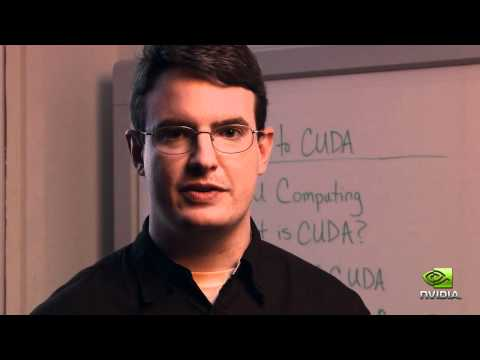

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("IzU4AVcMFys",width=640,height=360)

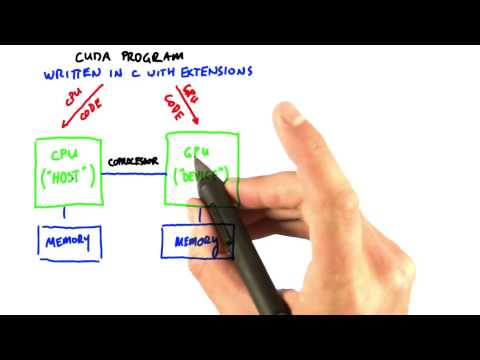

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("lQVV5JCd74I",width=640,height=360)

&#9989; **<font color=red>QUESTION:</font>**  What does the acronym GPGPU stand for?  

General Purpose Graphics Processing Unit

&#9989; **<font color=red>QUESTION:</font>** What is the name of the CUDA command that allocates memory on the GPU?

cudaMalloc

&#9989; **<font color=red>QUESTION:</font>** What is the name of the CUDA command that copies memory from the CPU to the GPU?

cudaMemcpy

&#9989; **<font color=red>QUESTION:</font>** What is the difference between the "HOST" and the "DEVICE" in CUDA terminology?

The host launches kernels (programs) on the device



---
<a name=CUDA-on-the-HPCC></a>
# 2. CUDA on the HPCC




Here is a video on how to use CUDA on the HPCC. Note that this video was made in 2019 so most of the software versions are out of date. Everything else should basically work fine.

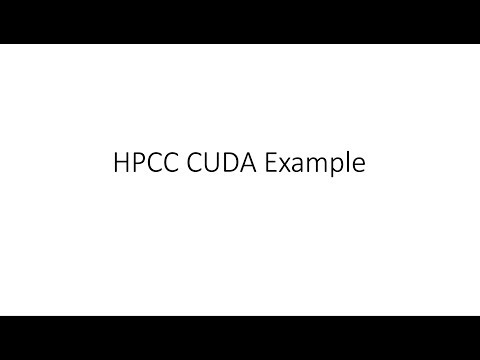

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("gzkKtcRpA6A",width=640,height=360)

Commands from the video

    ssh dev-intel16-k80
    module load powertools
    getexample cuda
    cd cuda
    module load CUDA
    nvcc -o simple_cuda simple.cu
    ./simple.cu
    

&#9989; **<font color=red>DO THIS:</font>** Here is the code as it was modified in the video.  See if you can get it working.

In [13]:
!mkdir NCode

In [15]:
%%writefile NCode/simple.cu

#include "cuda.h"
#include <iostream>
#define CUDA_CALL(x) {cudaError_t cuda_error__ = (x); if (cuda_error__) std::cout << "CUDA error: " << #x << " returned " << cudaGetErrorString(cuda_error__) << std::endl;}


__global__ void theKernel(float * our_array)
{
    //This is array flattening, (Array Width * Y Index + X Index)
    int index = (gridDim.x * blockDim.x) * \
              (blockIdx.y * blockDim.y + threadIdx.y) + \
              (blockIdx.x * blockDim.x + threadIdx.x);
    our_array[index] = (float) index;
}


void printGrid(float an_array[16][16])
{
    for (int i = 0; i < 16; i++)
    {
        for (int j = 0; j < 16; j++)
        {
            std::cout << an_array[i][j];
            std::cout << " ";
        }
        std::cout << std::endl;
    }
}


int main()
{
    float our_array[16][16];

    for (int i = 0; i < 16; i++)
    {
        for (int j = 0; j < 16; j++)
        {
            our_array[i][j] = i;
        }
    }

    //STEP 1: ALLOCATE
    float * our_array_d;
    int size = sizeof(float)*256;
    CUDA_CALL(cudaMalloc((void **) &our_array_d, size));

    //STEP 2: TRANSFER
    CUDA_CALL(cudaMemcpy(our_array_d, our_array, size, cudaMemcpyHostToDevice));

    //STEP 3: SET UP
    dim3 blockSize(8,8,1);
    dim3 gridSize(2,2,1);

    //STEP 4: RUN
    theKernel <<<gridSize, blockSize>>> (our_array_d);

    //STEP 5: TRANSFER
    printGrid(our_array);
    CUDA_CALL(cudaMemcpy(our_array, our_array_d, size, cudaMemcpyDeviceToHost));
    std::cout << "--------------------" << std::endl;
    printGrid(our_array);
}

Writing NCode/simple.cu


In [17]:
#Compile Cuda
!nvcc -o simple_cuda NCode/simple.cu

zsh:1: command not found: nvcc


In [ ]:
#Run Example
!./simple_cuda



---
<a name=Scheduling-GPUs-on-HPCC></a>
# 3. Scheduling GPUs on HPCC



The following video shows you how to schedule basic CUDA jobs on the HPCC.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("-y0ysuxbEa8",width=640,height=360)

Since making the above video I have learned that CUDA jobs work best if you include ```srun``` before the Cuda command.  For example, I reccomend modifying the ```./simple_cuda``` command line with the following


    srun time ./simple_cuda
    
    

&#9989; **<font color=red>QUESTION:</font>** What SLURM command should you add to your submission script to request a GPU?

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>** What module command do you need to include in your submission script to run CUDA programs?

Put your answer to the above question here.



---
<a name=Assignment-wrap-up></a>
# 4. Assignment wrap up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credits for the assignment!**

[Direct Link to Survey Form](https://cmse.msu.edu/cmse401-pc-survey)



&#9989; **<font color=red>Assignment-Specific QUESTION:</font>**  Where you able to get the example code to run on the HPCC?  If not, where did you get stuck?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Summarize what you did in this assignment.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **most** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **least** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Approximately how long did this pre-class assignment take?

Put your answer to the above question here

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse401-pc-survey" 
	width="100%" 
	height="500px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)


---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above survey from on or before the assignment due date.

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----

----